### Grid based-filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


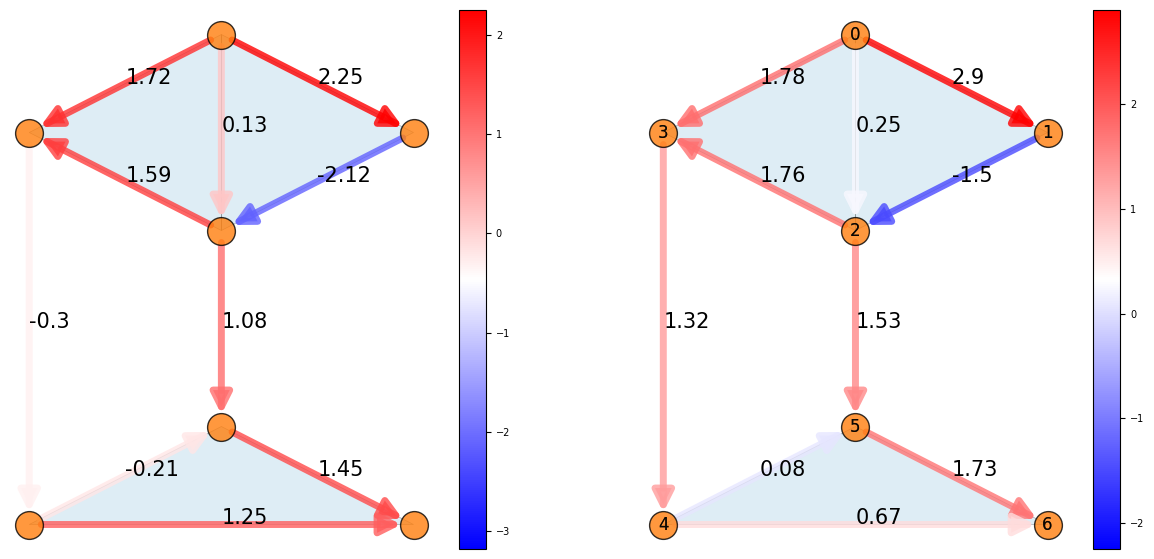

In [3]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

In [5]:
from sclibrary.filters import GridBasedFilterDesign

gbf = GridBasedFilterDesign(sc)

#### Denoising

mu: 0.5, error: 2.249761243656706
[1.         0.76634934 0.6212045  0.52228491 0.45054143 0.39612752
 0.35344087 0.31905911 0.29077346 0.26709463]
Filter size: 0 - Error: 2.4411367055495927
Filter size: 1 - Error: 2.4213198121770647
Filter size: 2 - Error: 2.214470856615755
Filter size: 3 - Error: 2.2310070874056653
Filter size: 4 - Error: 2.2492113301088317
Filter size: 5 - Error: 2.2507703955095213
Filter size: 6 - Error: 2.249946168404687
Filter size: 7 - Error: 2.2497086210129833
Filter size: 8 - Error: 2.249758723051055
Filter size: 9 - Error: 2.249758831161965
Filter size: 10 - Error: 2.249698382908171
Filter size: 11 - Error: 2.2496319460206005


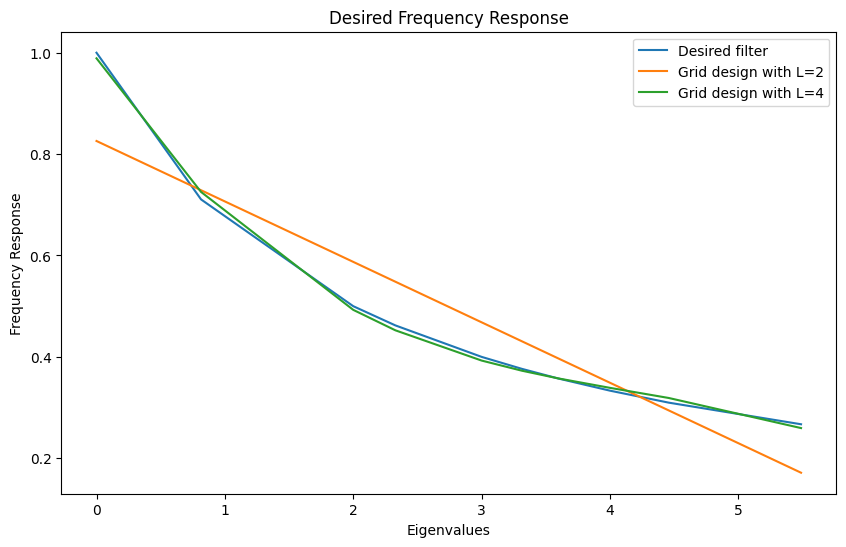

In [20]:
from sclibrary.filters import EdgeFlowDenoising
import matplotlib.pyplot as plt
from sclibrary.utils.eigendecomposition import get_eigendecomposition
   
f0 = np.array([
    -0.0689,
    -0.1378,
    0.2067,
    -0.0689,
    0.3445,
    -0.5512,
    0.5512,
    0.3675,
    0.1837,
    -0.1837,
])
 
f = np.array([
    0.8195,
    -1.2849,
    -0.8622,
    -0.8784,
    -2.5998,
    0.8872,
    0.8764,
    -0.3875,
    1.5540,
    -1.8952,
])
    
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(f=f, f_true=f0, p_choice="L1")
efd.plot_desired_frequency_response(p_choice="L1")

_, eigenvals = get_eigendecomposition(sc.hodge_laplacian_matrix())
gbf = GridBasedFilterDesign(sc)
gbf.denoise(f=f, f_true=f0,  L=12, p_choice="L1", mu=0.5)
plt.plot(eigenvals, gbf.history["frequency_responses"][1])
plt.plot(eigenvals, gbf.history["frequency_responses"][3])

plt.legend(["Desired filter", "Grid design with L=2", "Grid design with L=4"])


Filter size: 0 - Error: 0.5470748409907165
Filter size: 1 - Error: 0.7253847458975021
Filter size: 2 - Error: 0.7334733517882719
Filter size: 3 - Error: 0.7325779138357084
Filter size: 4 - Error: 0.7302570389755401
Filter size: 5 - Error: 0.7310473682837365
Filter size: 6 - Error: 0.73090701770242
Filter size: 7 - Error: 0.7309386198143929
Filter size: 8 - Error: 0.730939734614412
Filter size: 9 - Error: 0.7309440468585862


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


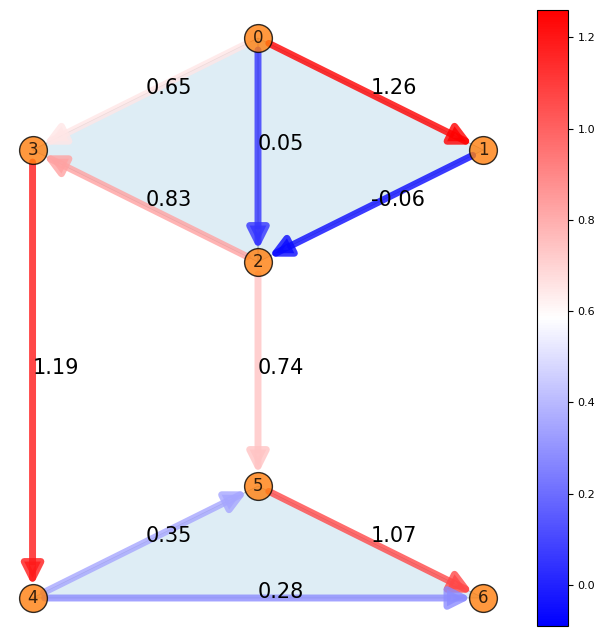

In [5]:
filter_size = 10
gbf.denoise(f=f, f_true=f0,  L=filter_size, p_choice="L1L", mu=0.5)

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.48100470416418967
Filter size: 1 - Error: 0.36919329741281043
Filter size: 2 - Error: 0.3691932974128103
Filter size: 3 - Error: 0.3859624677562695


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


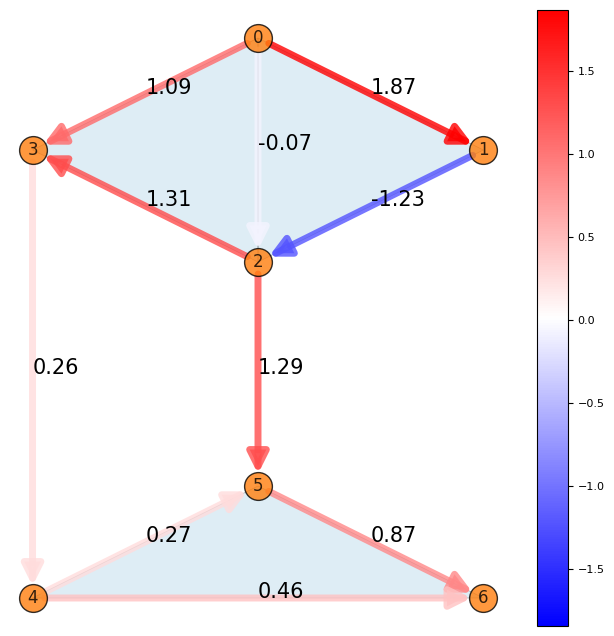

In [6]:
filter_size = 4

gbf.subcomponent_extraction(f=f, f_true=f0,  L=filter_size, p_choice="L1", component="gradient")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.23769437616782388
Filter size: 1 - Error: 0.2133105998687152
Filter size: 2 - Error: 0.18874481019594738
Filter size: 3 - Error: 0.11490116768750909
Filter size: 4 - Error: 0.0487946281238136
Filter size: 5 - Error: 0.02845739781180332
Filter size: 6 - Error: 0.02241976858266657
Filter size: 7 - Error: 0.015133786084024358
Filter size: 8 - Error: 0.00895214966341658
Filter size: 9 - Error: 0.005954721904252587


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


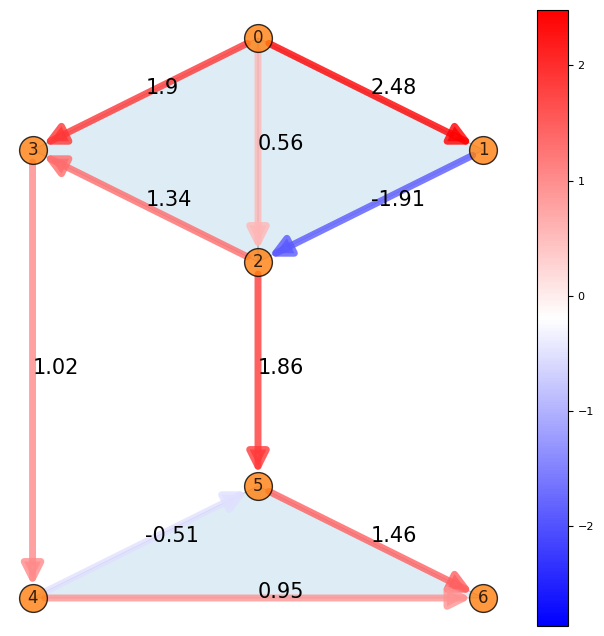

In [7]:
filter_size = 10

f_true = gbf.get_true_signal(f=f, component="gradient")
gbf.subcomponent_extraction(f=f, f_true=f_true,  L=filter_size, p_choice="L1L")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### General Filter

Filter size: 0 - Error: 0.48100470416418967
Filter size: 0 - Error: 0.7109746192207343


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


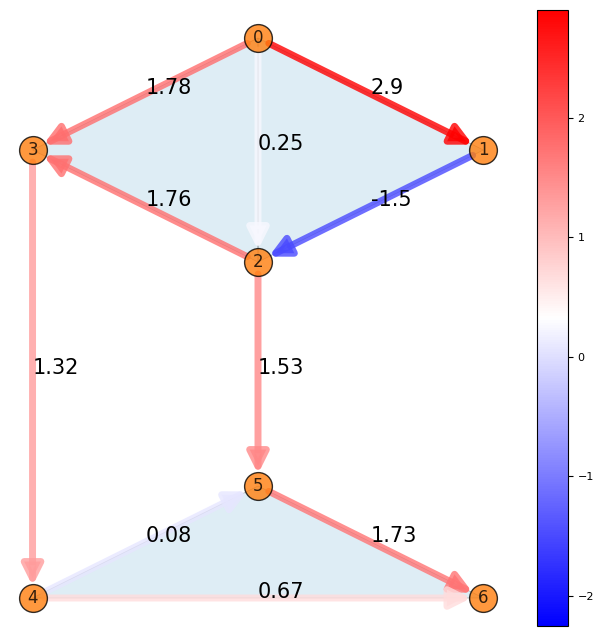

In [8]:

gbf = GridBasedFilterDesign(sc)

f_est_h, f_est_c, f_est_g = gbf.general_filter(
     f=f, f_true=f0, L1 = 1, L2 = 1
)

f_est = f_est_h + f_est_c + f_est_g

scplot.draw_network(edge_flow=np.round(f_est, 2))

In [9]:
gbf.history

{'L1': {'filter': array([[0.30000001, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.30000001, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.30000001, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.30000001, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.30000001,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.30000001, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.30000001, 0.        , 0.        , 0.        